# Assignment 2

## 1. Why is sigmoid rarely utilized as an activation function?

## 2. What are the advantages of the exotic ReLu functions over the standard ReLu activation?

## 3. What is the goal of regularization?

## 4. Describe batch normilization and it's benefits 

## 5. Describe how you might achieve augment a dataset for an ML problem of your choice

## 6.  How does dropout create more robust models? 

## 7. Develop a solution for the MNIST Classification problem using your library of choice

There are many wonderful

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import time

In [2]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                              torchvision.transforms.Normalize((0.5,), (0.5,)),
                              ])

In [3]:
trainset = torchvision.datasets.MNIST('training/', download=True, train=True, transform=transform)
valset = torchvision.datasets.MNIST('testing/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

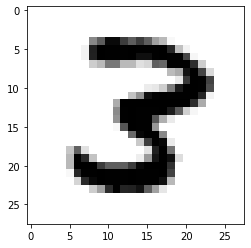

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

In [5]:
images[0].shape

torch.Size([1, 28, 28])

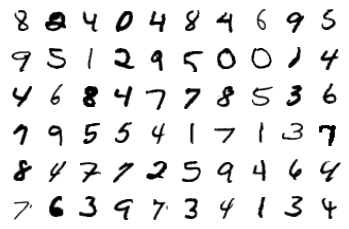

In [6]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [7]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = torch.nn.Sequential(torch.nn.Linear(input_size, hidden_sizes[0]),
                      torch.nn.ReLU(),
                      torch.nn.Linear(128, 64),
                      torch.nn.ReLU(),
                      torch.nn.Linear(64, 10),
                      torch.nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [8]:
criterion = torch.nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
logps = model(images) 
loss = criterion(logps, labels)

In [9]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time.time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time.time()-time0)/60)

Epoch 0 - Training loss: 0.630795730361298
Epoch 1 - Training loss: 0.27740790493198547
Epoch 2 - Training loss: 0.2125430490845429
Epoch 3 - Training loss: 0.16942866481959756
Epoch 4 - Training loss: 0.14062934612899003
Epoch 5 - Training loss: 0.12091445963361117
Epoch 6 - Training loss: 0.10564854021059043
Epoch 7 - Training loss: 0.09486594581023367
Epoch 8 - Training loss: 0.08517866962249758
Epoch 9 - Training loss: 0.07756746665431635
Epoch 10 - Training loss: 0.07099297946132323
Epoch 11 - Training loss: 0.06418337870879706
Epoch 12 - Training loss: 0.05965203259175997
Epoch 13 - Training loss: 0.05327501947701629
Epoch 14 - Training loss: 0.0498030247650286

Training Time (in minutes) = 2.784844501813253


In [10]:
def example(image):
    with torch.no_grad():
        logps = model(image.view(1, 784))
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    print("Predicted Digit =", probab.index(max(probab)))
    print("Class probability =", max(probab))
    plt.imshow(image.numpy().squeeze(), cmap='gray_r');

Predicted Digit = 9
Class probability = 0.9998559


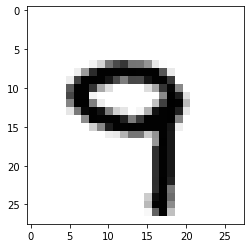

In [11]:
images, labels = next(iter(valloader))

example(images[0])

In [12]:
bad_results = []
good_results = []
for images,labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)
            ps = torch.exp(logps)
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
            true_label = labels.numpy()[i]
            if(true_label == pred_label):
                good_results = good_results + [img]
            else:
                bad_results = bad_results + [img]

total = len(good_results)+len(bad_results)
print("Number Of Images Tested =", total)
print("\nModel Accuracy =", (len(good_results)/total))

Number Of Images Tested = 10000

Model Accuracy = 0.9694


Predicted Digit = 7
Class probability = 0.9999063


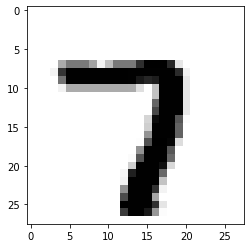

In [13]:
example(good_results[5].reshape(1,28,28))

Predicted Digit = 7
Class probability = 0.5304952


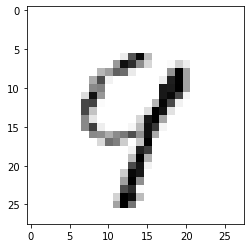

In [14]:
example(bad_results[10].reshape(1,28,28))